@yingke_yu

# MATH GR5030 Spring 2019, HW2 Interpolation Practice Rubric

In [1]:
from interpolation import cubic_spline, linear_interpolation, Neville_algo

## Test Sample:

In [2]:
x = [0, 5, 10, 25, 50, 61.03543, 76.03543, 81.03543, 86.03543]
y = [17.14, 16.44, 15.74, 15.04, 14.28, 15.64, 17.14, 18.64, 20.14]

## General:

In [ ]:
# g1: able to plot for all three interpolation
# g2: for plots, values of delta decrease when you look at the x-axis from left to right
# g3: tree like plot for neville algo
# g4: be able to change value of inputs
# g5: choice for user to control 2 degrees of freedom (first/second derivative)
# g6: customerized matrix inverter

## Test Case:

- ### Linear Interpolation:

In [3]:
li = linear_interpolation.Linear_itp(x, y)

In [4]:
assert round(li.interpolate(45), 4) == 14.4320 #..........t1
assert round(li.interpolate(0), 4) == 17.14 #..........t2
assert round(li.interpolate(86.03543), 4) == 20.14 #.......t3

- Not required, out of sample case should not be defined:

In [5]:
try:
    li.interpolate(-2)
except linear_interpolation.MyError as e:
    print(e)

Given target out of reach for linear interpolation


In [6]:
try:
    li.interpolate(90)
except linear_interpolation.MyError as e:
    print(e)

Given target out of reach for linear interpolation


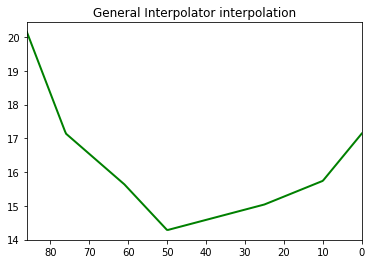

In [7]:
li.plot()

- ### Polynomial Interpolation:

In [8]:
pi = Neville_algo.Poly_itp(x, y)

In [17]:
# I check tree for this one
assert round(pi.interpolate(45, pt=True), 4) == 13.8103 #..........t4

result for target 45 is: 
     0.0 →    17.14 →    10.84 →    10.84 →     22.6 →  15.5104 →   14.616 →  14.3206 →  14.0896 →  13.8103
     5.0 ↗    16.44 ↗    10.84 ↗  17.3733 ↗  14.7227 ↗  14.2973 ↗  14.1168 ↗  13.9046 ↗  13.5556 ↗ 
    10.0 ↗    15.74 ↗  14.1067 ↗  14.3913 ↗  14.1268 ↗  13.9767 ↗  13.7134 ↗  13.1976 ↗ 
    25.0 ↗    15.04 ↗   14.432 ↗  14.0056 ↗  13.8436 ↗  13.4422 ↗  12.5929 ↗ 
    50.0 ↗    14.28 ↗  13.6638 ↗  13.5922 ↗  12.7189 ↗  10.8502 ↗ 
 61.0354 ↗    15.64 ↗  14.0365 ↗  19.0131 ↗  26.1866 ↗ 
 76.0354 ↗    17.14 ↗   7.8294 ↗   7.8294 ↗ 
 81.0354 ↗    18.64 ↗   7.8294 ↗ 
 86.0354 ↗    20.14 ↗ 
********************************************


In [10]:
assert round(pi.interpolate(0), 4) == 17.14 #..........t5
assert round(pi.interpolate(86.03543), 4) == 20.14 #..........t6
assert round(pi.interpolate(90, pt=True), 4) == 19.2079 #..........t7

result for target 90 is: 
     0.0 →    17.14 →     4.54 →     4.54 →   118.78 → -105.0488 → 120.8418 → -13.9522 →  33.4703 →  19.2079
     5.0 ↗    16.44 ↗     4.54 ↗  36.2733 ↗  -5.5693 ↗  48.1438 ↗   6.9627 ↗  28.7467 ↗  19.8362 ↗ 
    10.0 ↗    15.74 ↗  12.0067 ↗  14.1213 ↗  29.8405 ↗  13.7283 ↗  26.4493 ↗  20.2518 ↗ 
    25.0 ↗    15.04 ↗   13.064 ↗  24.1493 ↗  16.5408 ↗  25.0238 ↗  20.5589 ↗ 
    50.0 ↗    14.28 ↗  19.2096 ↗  18.1754 ↗  23.8539 ↗  20.8313 ↗ 
 61.0354 ↗    15.64 ↗  18.5365 ↗  22.5812 ↗  21.1308 ↗ 
 76.0354 ↗    17.14 ↗  21.3294 ↗  21.3294 ↗ 
 81.0354 ↗    18.64 ↗  21.3294 ↗ 
 86.0354 ↗    20.14 ↗ 
********************************************


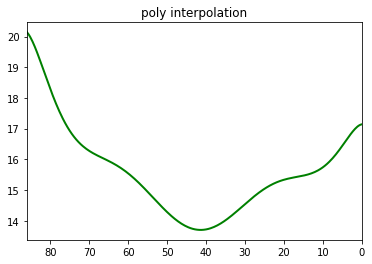

In [11]:
pi.plot()

- ### Cubic Spline Interpolation

In [12]:
#natural spline
ci = cubic_spline.Cubic_itp(x, y, condition='n')

In [13]:
assert round(ci.interpolate(45), 4) == 14.0425 #..........t8
assert round(ci.interpolate(0), 4) == 17.14 #..........t9
assert round(ci.interpolate(86.03543), 4) == 20.14 #.......t10

In [15]:
try:
    ci.interpolate(90)
except cubic_spline.MyError as e:
    print(e)

target value is out of reach


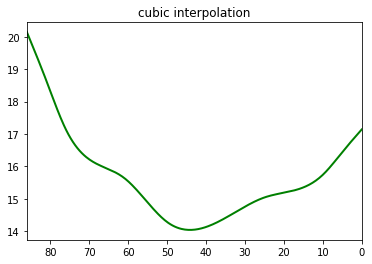

In [16]:
ci.plot()

In [27]:
#first derivative spline
# this is a stupid head tail setting but i don't care
ci = cubic_spline.Cubic_itp(x, y, condition='ff', head=100, tail=100)

In [23]:
assert round(ci.interpolate(45), 4) == 6.3067 #..........t11
assert round(ci.interpolate(0), 4) == 17.14 #..........t12
assert round(ci.interpolate(86.03543), 4) == 20.14 #.......t13

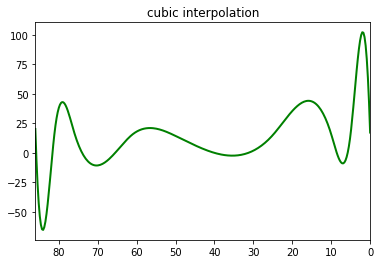

In [24]:
ci.plot()

In [32]:
#second derivative spline
ci = cubic_spline.Cubic_itp(x, y, condition='ss', head=100, tail=100)

In [36]:
assert round(ci.interpolate(45), 4) == 16.4701 #..........t14
assert round(ci.interpolate(0), 4) == 17.14 #..........t15
assert round(ci.interpolate(86.03543), 4) == 20.14 #.......t16

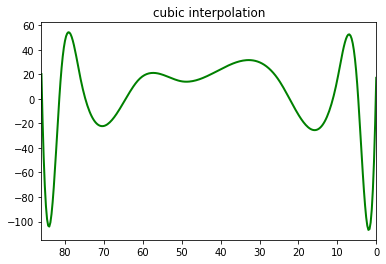

In [37]:
ci.plot()

## Grading:

In [ ]:
'''
g1 - g5: 2'
g6: 5'
t1, t4, t8, t11, t14: 5'
other t: 2'
'''

## Two 'identical' homework, which means if I am 100% sure two are copying each other, then both gets 0